In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt


drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/dhnstr/Geospatial/main/covid_19_indonesia_time_series_all.csv")
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
start_date = "2021-05-01"
end_date = df['Date'].max()
df = df.query(f'Date >= "{start_date}" and Date <= "{end_date}"')
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
14218,2021-05-01,ID-AC,Aceh,124,2,118,4,11169,441,9728,...,4.225615,23.63,2128.54,0.38,84.04,8.40,3.95%,87.10%,1.59,2.00
14219,2021-05-01,ID-BA,Bali,142,10,165,-33,44813,1346,42135,...,-8.369472,33.68,10628.84,2.37,319.25,31.92,3.00%,94.02%,1.04,1.67
14220,2021-05-01,ID-BT,Banten,53,0,28,25,47396,1210,44239,...,-6.456736,4.94,4420.29,0.00,112.85,11.28,2.55%,93.34%,0.74,0.00
14221,2021-05-01,ID-BE,Bengkulu,102,0,40,62,6884,172,5884,...,-3.533584,51.01,3442.79,0.00,86.02,8.60,2.50%,85.47%,2.37,1.00
14222,2021-05-01,ID-JK,DKI Jakarta,926,15,793,118,409540,6681,395761,...,-6.204699,85.38,37759.04,1.38,615.98,61.60,1.63%,96.64%,1.17,3.75


In [6]:
data = df.drop(['City or Regency','Location ISO Code','Province','Country','Continent','Island','Time Zone','Special Status','Total Regencies','Total Cities','Total Districts','Total Urban Villages',
                'Total Rural Villages','New Cases per Million','Total Cases per Million',
                'New Deaths per Million','Total Deaths per Million','Case Fatality Rate',
                'Case Recovered Rate','Growth Factor of New Cases','Growth Factor of New Deaths'], axis = 1)
data = data.fillna(0)
data.head()

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Area (km2),Population,Population Density,Longitude,Latitude,Total Deaths per 100rb
14218,2021-05-01,Aceh,124,2,118,4,11169,441,9728,1000,Province,57956,5247257,90.54,96.910522,4.225615,8.40
14219,2021-05-01,Bali,142,10,165,-33,44813,1346,42135,1332,Province,5780,4216171,729.43,115.131714,-8.369472,31.92
14220,2021-05-01,Banten,53,0,28,25,47396,1210,44239,1947,Province,9663,10722374,1109.64,106.109004,-6.456736,11.28
14221,2021-05-01,Bengkulu,102,0,40,62,6884,172,5884,828,Province,19919,1999539,100.38,102.338421,-3.533584,8.60
14222,2021-05-01,DKI Jakarta,926,15,793,118,409540,6681,395761,7098,Province,664,10846145,16334.31,106.836118,-6.204699,61.60


In [7]:
data.isna().mean()

Date                      0.0
Location                  0.0
New Cases                 0.0
New Deaths                0.0
New Recovered             0.0
New Active Cases          0.0
Total Cases               0.0
Total Deaths              0.0
Total Recovered           0.0
Total Active Cases        0.0
Location Level            0.0
Area (km2)                0.0
Population                0.0
Population Density        0.0
Longitude                 0.0
Latitude                  0.0
Total Deaths per 100rb    0.0
dtype: float64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17604 entries, 14218 to 31821
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    17604 non-null  datetime64[ns]
 1   Location                17604 non-null  object        
 2   New Cases               17604 non-null  int64         
 3   New Deaths              17604 non-null  int64         
 4   New Recovered           17604 non-null  int64         
 5   New Active Cases        17604 non-null  int64         
 6   Total Cases             17604 non-null  int64         
 7   Total Deaths            17604 non-null  int64         
 8   Total Recovered         17604 non-null  int64         
 9   Total Active Cases      17604 non-null  int64         
 10  Location Level          17604 non-null  object        
 11  Area (km2)              17604 non-null  int64         
 12  Population              17604 non-null  in

In [9]:
posCovid = data.groupby('Location')['Total Cases'].sum().reset_index()
print(posCovid)

                      Location  Total Cases
0                         Aceh     17988702
1                         Bali     60647415
2                       Banten     95416545
3                     Bengkulu     11557248
4                  DKI Jakarta    491986480
5   Daerah Istimewa Yogyakarta     82184832
6                    Gorontalo      5745019
7                    Indonesia   2324728927
8                        Jambi     14865747
9                   Jawa Barat    409318924
10                 Jawa Tengah    249442103
11                  Jawa Timur    216605022
12            Kalimantan Barat     22553128
13          Kalimantan Selatan     34827301
14           Kalimantan Tengah     23011925
15            Kalimantan Timur     81415955
16            Kalimantan Utara     17527619
17   Kepulauan Bangka Belitung     25633972
18              Kepulauan Riau     27479207
19                     Lampung     27139309
20                      Maluku      7668201
21                Maluku Utara  

In [11]:
totcase = gpd.read_file("/content/drive/MyDrive/GeoVisdat/gadm41_IDN_4.shp")
# totcase.drop(["NAME_0"],axis=1,inplace=True)
totcase.rename(columns = {"NAME_1":"Provinsi"}, inplace = True)


In [12]:
posCovid.rename(columns={
    'Location':'Provinsi'
},inplace=True)
posCovid

,Provinsi,Total Cases
0,Aceh,17988702
1,Bali,60647415
2,Banten,95416545
3,Bengkulu,11557248
4,DKI Jakarta,491986480
5,Daerah Istimewa Yogyakarta,82184832
6,Gorontalo,5745019
7,Indonesia,2324728927
8,Jambi,14865747
9,Jawa Barat,409318924


In [14]:
geo = totcase.merge(posCovid.sort_values(by='Provinsi'),on='Provinsi')
geo.head(10)

,GID_4,GID_0,COUNTRY,GID_1,Provinsi,GID_2,NAME_2,GID_3,NAME_3,NAME_4,VARNAME_4,TYPE_4,ENGTYPE_4,CC_4,geometry,Total Cases
0,IDN.1.2.1.1_1,IDN,Indonesia,IDN.1_1,Aceh,IDN.1.2_1,Aceh Barat,IDN.1.2.1_1,Arongan Lambalek,Alue Bagok,NA,Desa,Village,1107062026,"POLYGON ((95.97096 4.33389, 95.97076 4.33393, ...",17988702
1,IDN.1.2.1.2_1,IDN,Indonesia,IDN.1_1,Aceh,IDN.1.2_1,Aceh Barat,IDN.1.2.1_1,Arongan Lambalek,Alue Batee,NA,Desa,Village,1107062027,"POLYGON ((95.98297 4.33379, 95.97897 4.33669, ...",17988702
2,IDN.1.2.1.3_1,IDN,Indonesia,IDN.1_1,Aceh,IDN.1.2_1,Aceh Barat,IDN.1.2.1_1,Arongan Lambalek,Alue Sundak,NA,Desa,Village,1107062025,"POLYGON ((95.97069 4.33065, 95.97118 4.33034, ...",17988702
3,IDN.1.2.1.4_1,IDN,Indonesia,IDN.1_1,Aceh,IDN.1.2_1,Aceh Barat,IDN.1.2.1_1,Arongan Lambalek,Arongan,NA,Desa,Village,1107062005,"POLYGON ((95.95847 4.27575, 95.95673 4.27826, ...",17988702
4,IDN.1.2.1.5_1,IDN,Indonesia,IDN.1_1,Aceh,IDN.1.2_1,Aceh Barat,IDN.1.2.1_1,Arongan Lambalek,Cot Buloh,NA,Desa,Village,1107062014,"POLYGON ((95.95985 4.32356, 95.96027 4.32331, ...",17988702
5,IDN.1.2.1.6_1,IDN,Indonesia,IDN.1_1,Aceh,IDN.1.2_1,Aceh Barat,IDN.1.2.1_1,Arongan Lambalek,Cot Jurumudi,NA,Desa,Village,1107062024,"POLYGON ((95.96609 4.33524, 95.96644 4.33488, ...",17988702
6,IDN.1.2.1.7_1,IDN,Indonesia,IDN.1_1,Aceh,IDN.1.2_1,Aceh Barat,IDN.1.2.1_1,Arongan Lambalek,Cot Kumbang,NA,Desa,Village,1107062006,"POLYGON ((95.95847 4.27575, 95.95908 4.27642, ...",17988702
7,IDN.1.2.1.8_1,IDN,Indonesia,IDN.1_1,Aceh,IDN.1.2_1,Aceh Barat,IDN.1.2.1_1,Arongan Lambalek,Drien Rampak,NA,Desa,Village,1107062013,"POLYGON ((95.96707 4.31826, 95.96721 4.31808, ...",17988702
8,IDN.1.2.1.9_1,IDN,Indonesia,IDN.1_1,Aceh,IDN.1.2_1,Aceh Barat,IDN.1.2.1_1,Arongan Lambalek,Gunong Pulo,NA,Desa,Village,1107062018,"POLYGON ((95.92894 4.39408, 95.92894 4.39365, ...",17988702
9,IDN.1.2.1.10_1,IDN,Indonesia,IDN.1_1,Aceh,IDN.1.2_1,Aceh Barat,IDN.1.2.1_1,Arongan Lambalek,Karang Hampa,NA,Desa,Village,1107062019,"POLYGON ((95.95277 4.37101, 95.95237 4.37152, ...",17988702


<Axes: >

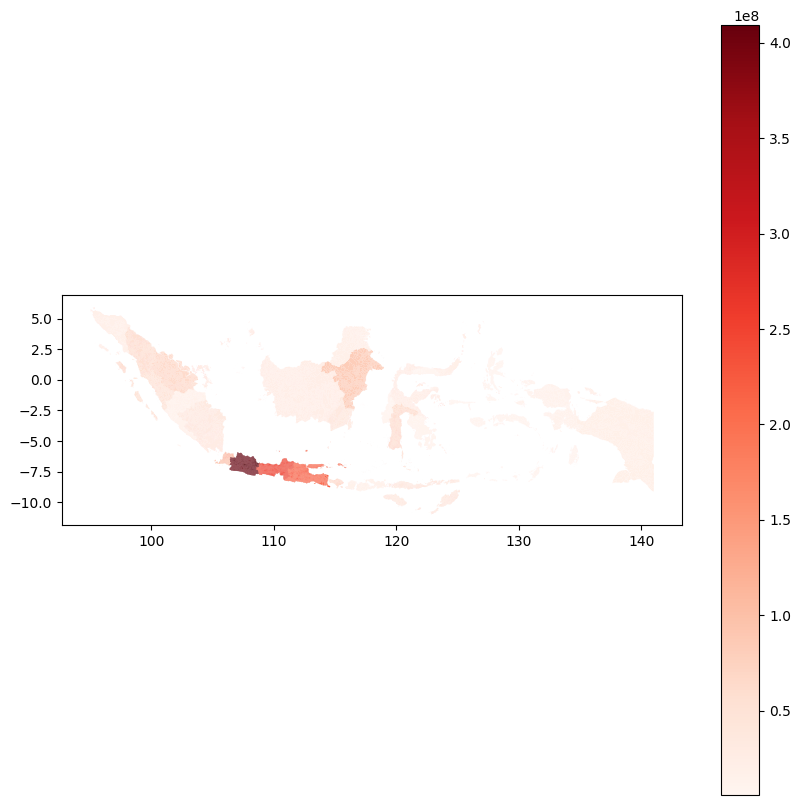

In [17]:
geo.plot("Total Cases", cmap="Reds", figsize=(10,10), legend=True)
